In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data = pd.read_csv('fakeData.csv')
data

,stream,scope,grid,coupled,u-inlet,p-inlet,particles,ice,temp,mass,length
0,one,nozzle,coarse,True,inletOutlet,inletOutlet,2125.0,741.0,318.14,0.03100,3.6500
1,one,whole,coarse,True,freestream,freestream,2214.0,730.0,320.25,0.03900,2.4500
2,one,nozzle,fine,True,freestream,freestream,2217.0,752.0,319.69,0.03500,3.6900
3,one,whole,fine,True,inletOutlet,inletOutlet,2211.0,727.0,320.23,0.03700,3.2400
4,one,nozzle,coarse,False,freestream,freestream,2202.0,761.0,319.95,0.03220,3.1400
5,two,nozzle,coarse,False,freestream,freestream,2207.0,755.0,318.17,0.03130,4.1600
6,two,whole,fine,False,inletOutlet,inletOutlet,2206.0,738.0,318.81,0.03700,2.3690
7,two,nozzle,coarse,True,freestream,freestream,2231.0,746.0,318.31,0.03250,5.2100
8,two,whole,fine,False,inletOutlet,inletOutlet,2229.0,749.0,317.22,0.02910,3.2400
9,two,nozzle,coarse,True,freestream,freestream,2218.0,730.0,348.25,0.03551,3.2540


In [39]:
"""Gower’s disatance/measure/coefficient/similarity is a measure to find
the similarity between two rows of a dataset consisting of mixed type attributes.
It uses the concept of Manhattan distance for continuous variables and dice
distance for measuring similarity between Binary variables.

https://medium.com/analytics-vidhya/concept-of-gowers-distance-and-it-s-application-using-python-b08cf6139ac2

https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad

https://bpostance.github.io/posts/clustering-mixed-data/
"""


import gower

# cat = [True, True, True, True,True,True,False,False,False,False,False]

# print(cat)

gd = gower.gower_matrix(data)

print(f"Data shape: {data.shape}\nMatrix shape: {gd.shape}")
# print(gd)

Data shape: (13, 11)
Matrix shape: (13, 13)


[0.4607796  0.4019104  0.33774847 0.41070244 0.4833115  0.5144215
 0.4307692  0.493959   0.45521    0.5386027  0.3251463  0.266597
 0.30221537 0.31959134 0.33017543 0.44253948 0.4969965  0.36408144
 0.6008991  0.26864132 0.7445599  0.6283297  0.50882995 0.3659164
 0.25058475 0.3270563  0.5531272  0.27316827 0.52404296 0.29173175
 0.65358484 0.5714465  0.51859    0.57718045 0.6831447  0.24270552
 0.60960066 0.30096376 0.5142139  0.4397639  0.51021254 0.37602413
 0.1500381  0.5686769  0.31260934 0.5311659  0.33190158 0.6462699
 0.41117635 0.5332632  0.49781936 0.17350194 0.44000593 0.2551517
 0.5858827  0.30559123 0.43369412 0.6126455  0.12219045 0.56035924
 0.25658903 0.33143923 0.43691146 0.5479878  0.17014164 0.7449349
 0.39555508 0.36931232 0.58967346 0.2619451  0.24596788 0.39758706
 0.67472863 0.4343899  0.2923619  0.49116677 0.58464015 0.17315   ]


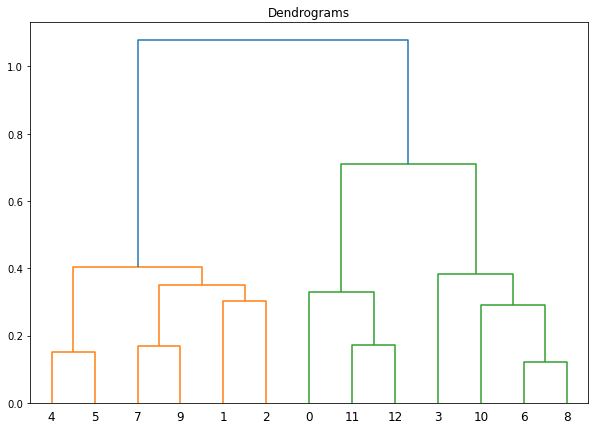

In [46]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

gdv = squareform(gd,force='tovector')

print(gdv)


Z = linkage(gdv,method='ward')

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(Z)


In [48]:
print(f"Leaves = {len(dn['leaves'])}")

Leaves = 13


C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


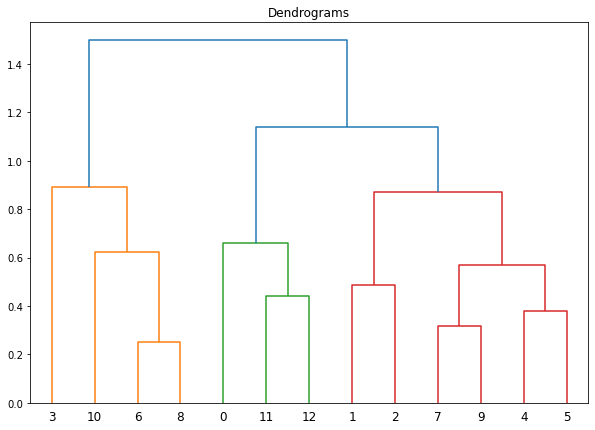

In [49]:
Z = linkage(gd,method='complete')

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(Z)

C:\Users\evladmin\Anaconda3\envs\server-png\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


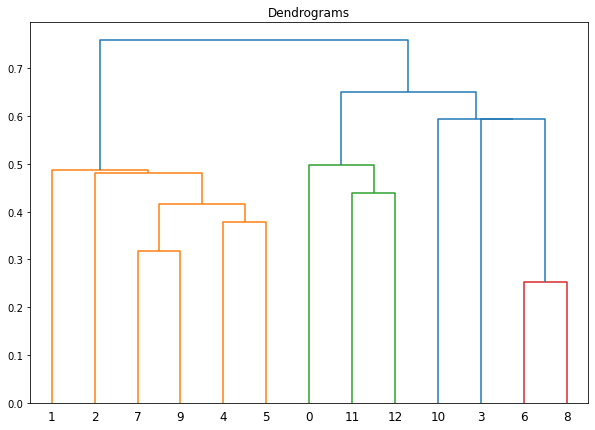

In [50]:
Z = linkage(gd)

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(Z)